<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230304/%EC%9D%B4%EC%A4%80%EC%9A%B0_%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_4_2%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#경사 하강법 알고리즘

##핵심 키워드
###확률적 경사 하강법
* 훈련세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
* 샘플을 여러개 사용하면 미니배치 경사 하강법
* 샘플을 모두 사용하면 배치 경사 하강법
###손실함수
* 확률적 경사 하강법이 최적화할 대상
* 이진 분류에는 로지스틱회귀 손실함수 사용
* 다중 분류에는 크로스엔트로피 손실 함수 사용
* 회귀 문제에는 평균 제곱 오차 손실 함수 사용
###에포크
* 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한번 반복을 의미함

##점진적 학습(시간이 지날수록 더 많은 데이터가 필요할때 그 전의 데이터들을 지우면서 훈련하는 방식

* 훈련세트에서 랜덤하게 하나의 가파른 길을 찾는것이 확률적 경사하강법

* 목적지에 도달할때 까지 다시 새로운 랜덤샘플을 선택하여 반복(에포크)
* 여러개의 샘플로 경사하강법을 수행하는 방식을 미니배치 경사 하강법이라고 함

* 비용함수 = 손실함수 - 머신러닝의 알고리즘이 얼마나 엉터리인지를 측정하는 기준

* 손실함수는 미분이 가능해야함

* 로지스틱 손실 함수=이진 크로스엔트로피 손실함수
* 예측확률이 0에서 멀어질수록 손실은 아주 큰 양수가 됨

* 다중분류에서 사용하는 손실함수를 크로스엔트로피 손실함수라고 함

##확률적 경사하강법을 사용한 분류모델 만들기

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=10,random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


*모델을 이어서 훈련할때 partial_fit()메서드 사용

In [9]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


###에포크의 과대/과소적합


In [11]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [12]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


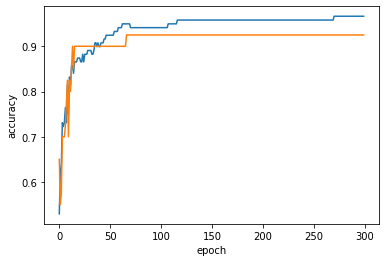

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [17]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


##SGDClassifier의 loss 매개변수
* 기본값은 힌지
* 힌지손실은 서포트 벡터 머신이라고 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수

In [19]:
sc = SGDClassifier(loss='hinge',max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
